In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Social_Network_Ads.csv")

In [ ]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
df.shape

(400, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [ ]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


<ipython-input-7-0fafe04ea3f6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

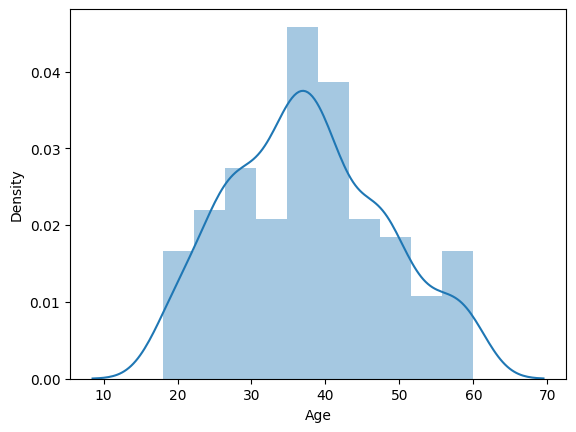

In [ ]:
sns.distplot(df['Age'])

<ipython-input-8-cca866f85a80>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['EstimatedSalary'])


<Axes: xlabel='EstimatedSalary', ylabel='Density'>

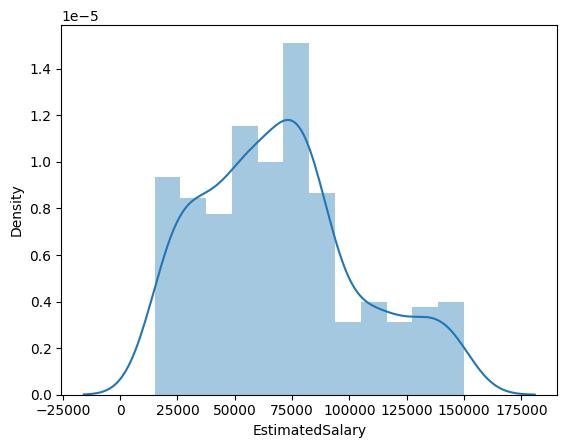

In [ ]:
sns.distplot(df['EstimatedSalary'])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
df.loc[:,['Age', 'EstimatedSalary']] = sc.fit_transform(df.loc[:,['Age', 'EstimatedSalary']].values)

In [ ]:
df.head()

,Age,EstimatedSalary,Purchased
0,-1.781797,-1.490046,0
1,-0.253587,-1.460681,0
2,-1.113206,-0.785290,0
3,-1.017692,-0.374182,0
4,-1.781797,0.183751,0


In [ ]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.20, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
prediction = lgr.predict(x_test)
print(prediction)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1]


In [ ]:
predictionData = {'Prediction':prediction, 'Actual':y_test}
predictionData = pd.DataFrame(predictionData)
predictionData.sample(5)

,Prediction,Actual
15,0,0
27,0,0
37,0,0
53,0,0
57,0,0


In [ ]:
from sklearn.metrics import confusion_matrix

actual_values = y_test

predicted_values = prediction

cm = confusion_matrix(actual_values, predicted_values)


In [ ]:
TP = cm[0,0]
FP = cm[0,1]
TN = cm[1,0]
FN = cm[1,1]

In [ ]:
print("Confusion Matrix:")
print(cm)
print("TP =", TP)
print("FP =", FP)
print("TN =", TN)
print("FN =", FN)
#These values indicate how many of the values were predicted correctly(TP), predicted to be falsely true(FP), correctly predicted as negative(TN), incorrectedly predicted as negative(FN)

Confusion Matrix:
[[57  1]
 [ 5 17]]
TP = 57
FP = 1
TN = 5
FN = 17


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy_score(y_test, prediction)

0.925

In [ ]:
precision_score(y_test, prediction)

0.9444444444444444

In [ ]:
recall_score(y_test, prediction)

0.7727272727272727

In [ ]:
error_rate = 1-accuracy_score(y_test, prediction)

In [ ]:
error_rate*100

7.499999999999996